# Classification on Adult Dataset

We will be importing all the required libraries which are required for our use. We will use scikit-learn for building classifiers and calculating performance metrics. 

In [1]:
#Importing all required modules
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Classifiers using Scikit-Learn for Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Importing Metrics and Model-Selection techniques
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, roc_auc_score

In [2]:
#Downloading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", 
           "occupation", "relationship","race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
           
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace = True)

In [3]:
#Printing the first few values, to understand about the attributes.

#Head data
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Now, before we begin any transformation, as we saw in our first assignment, we will remove duplicates, missing values and any outliers. There are few values for Capital Gain which we consider as outliers.

In [4]:
# Dropping missing values
data = data.dropna()
# Dropping duplicate values
data = data.drop_duplicates()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)

As a part of data preprocessing before feeding into the classifier, we would be taking the following measures.

1. education-num - This attribute is same as education column, so we can use just one of those two.
2. fnlwgt - This attribute is useless, as it doesn't have any correlation with any attribute. We will remove this attribute.
3. capital-gain and capital-loss - We can sum up capital gain and loss to have a column "net-capital-gain" rather than having two columns representing different values.
4. education - We could divide this into different classes like described above(Dropout, HighSchoolGrad, Community college, Bachelors, Masters, Doctorate). This gives us more solid categories, which could have more impact on prediction of the income.
5. marital-status - Similar to education, we could just have 4 classes like NotMarried, Married, Seperated and Widowed to categorize this attribute.
6. race - Remain as it is.
7. occupation - Similar to education, we could just have 5 classes like Blue-Collar jobs, White-Collar jobs, service jobs, professional-speciality jobs, others.
8. working-class - Similar to education, we could just have 4 classes like Government, Private, Self-employed, others.
9. Sex - Remain as it is.
10. Hours-per-week - Remain as it is.
11. Income - Remain as it is.
12. Native-Country - Similar to education, we could just have 2 classes namely USA and others.

In [5]:
#Grouping Categorical Attributes
#Grouping Education
data['education'].replace('Preschool', 'Dropout',inplace=True)
data['education'].replace('10th', 'Dropout',inplace=True)
data['education'].replace('11th', 'Dropout',inplace=True)
data['education'].replace('12th', 'Dropout',inplace=True)
data['education'].replace('1st-4th', 'Dropout',inplace=True)
data['education'].replace('5th-6th', 'Dropout',inplace=True)
data['education'].replace('7th-8th', 'Dropout',inplace=True)
data['education'].replace('9th', 'Dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('HS-grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)

# Grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")

# Grouping marital status
data['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
data['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
data['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

#Grouping working class
data['work-class'].replace('State-gov', 'Government',inplace=True)
data['work-class'].replace('Self-emp-not-inc', 'Self-Employed',inplace=True)
data['work-class'].replace('Private', 'Private',inplace=True)
data['work-class'].replace('Federal-gov', 'Government',inplace=True)
data['work-class'].replace('Local-gov', 'Government',inplace=True)
data['work-class'].replace('Self-emp-inc', 'Self-Employed',inplace=True)
data['work-class'].replace('Without-pay', 'Others',inplace=True)
data['work-class'].replace('Never-worked', 'Others',inplace=True)

# Grouping occupation
data['occupation'].replace('Adm-clerical', 'White-Collar',inplace=True)
data['occupation'].replace('Exec-managerial', 'White-Collar',inplace=True)
data['occupation'].replace('Handlers-cleaners', 'Blue-Collar',inplace=True)
data['occupation'].replace('Prof-speciality', 'Professional',inplace=True)
data['occupation'].replace('Other-service', 'Service',inplace=True)
data['occupation'].replace('Sales', 'Service',inplace=True)
data['occupation'].replace('Craft-repair', 'Blue-Collar',inplace=True)
data['occupation'].replace('Transport-moving', 'Blue-Collar',inplace=True)
data['occupation'].replace('Farming-fishing', 'Blue-Collar',inplace=True)
data['occupation'].replace('Machine-op-inspct', 'Blue-Collar',inplace=True)
data['occupation'].replace('Tech-support', 'Service',inplace=True)
data['occupation'].replace('Protective-serv', 'Service',inplace=True)
data['occupation'].replace('Armed-Forces', 'Other',inplace=True)
data['occupation'].replace('Priv-house-serv', 'Blue-Collar',inplace=True)

In [6]:
# Combining capital-gain and capital-loss into 1 column
data['net-capital-gain'] = data.apply(lambda x: x['capital-gain'] - x['capital-loss'], axis=1)
#Drop columns fnlwgt, education, workclass
data = data.drop(columns=['capital-gain','capital-loss','education-num','fnlwgt'])
data.head()

,age,work-class,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,net-capital-gain
0,39,Government,Bachelors,NotMarried,White-Collar,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-Employed,Bachelors,Married,White-Collar,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,HighSchoolGrad,Separated,Blue-Collar,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,Dropout,Married,Blue-Collar,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,Others,<=50K,0


Since categorical attributes are strings, we will convert them to integers with each integer value representing a particular category. We will use LabelEncoder function from scikit-learn library to do this.

In [7]:
#Converting categorical varibales to Categories using scikit-learn
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for column in data:
    if data.dtypes[column]==np.object:
        data[column] = labelEncoder.fit_transform(data[column])

data.head()

,age,work-class,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,net-capital-gain
0,39,0,0,1,4,1,4,1,40,1,0,2174
1,50,3,0,0,4,0,4,1,13,1,0,0
2,38,2,4,2,0,1,4,1,40,1,0,0
3,53,2,3,0,0,0,2,1,40,1,0,0
4,28,2,0,0,2,5,2,0,40,0,0,0


In [8]:
#Rearranging the columns so that we can fit our data into features and labels.
data = data[['age', 'work-class','education','marital-status', 'occupation', 'relationship','race', 'sex', 'hours-per-week', 'native-country','net-capital-gain', 'income']]
data.head()

,age,work-class,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,net-capital-gain,income
0,39,0,0,1,4,1,4,1,40,1,2174,0
1,50,3,0,0,4,0,4,1,13,1,0,0
2,38,2,4,2,0,1,4,1,40,1,0,0
3,53,2,3,0,0,0,2,1,40,1,0,0
4,28,2,0,0,2,5,2,0,40,0,0,0


We have our data as a single table. To build a classification model, we need to split the data into features and labels. As the problem is to predict whether the income of the person exceeds 50k or not, the column income is the label, with all the other columns forming the features for our classification model.

In [9]:
#Splitting into data and label for classification
num_columns = len(data.columns) -1
data_array = data.values
X = data_array[:,0:num_columns-1]
Y = data_array[:,num_columns]

Now, it is necessary to split our dataset into training and test set so that we can measure the performance of our model. We will use scikit-learn library's train_test_split function with 80% of the data for training and 20% of the data for testing purposes.

In [10]:
#Using train test split for Adult Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=20, shuffle=True)

For the adult dataset, we will use the Single Holdout evaluation approach that would allow us to choose from the different classifiers we build and then use the best model to test on the testing set.

We use an 80-20 split for the Single Holdout evaluation method where 80% is the training data and 20% is the validation data.

In [11]:
#Using single holdout method for computing generalization performance
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=20, shuffle=True)

The first classifier we are going to build is the K Nearest Neighbor(KNN) Classifier which uses the class labels of K Closest Neighbors to find the class label of unknown records.

Parameters used are:
1. n_neighbors = 11 - The value of number of neighbors shouldn't be too low or too high. After trying out different values, 11 neighbors gave the optimum generalization performance.
2. Proximity metric - Minkowski distance, which is a generalization of the Euclidean distance and is a good metric for calculating the nearest distance when the dimensions are more.

We also don't do any sort of Standardization/Normalization since there is only one numerical attribute with huge range of values(Net-Capital-Gain) and normalizing the attribute didn't bring any significant change to the performance of the model.

In [12]:
#Classifier 1: KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)
Y_knn_val_predicted = knn.predict(X_val)
print("Validation Score for KNN:", knn.score(X_val, Y_val))

Validation Score for KNN: 0.8014169618670557


We also calculate various performance statistics on the validation data.

The confusion matrix representation for all the Confusion matrices printed henceforth is as follows:
C00 - True Negatives
C10 - False Negatives
C11 - True Positives
C01 - False Positives

Using the confusion matrix, we also calculate TPR, FPR, Precision, F-Measure. To plot the ROC Curve, we use the scikit learn library roc_curve, and the library roc_auc_score to calculate the area under the ROC Curve.

Confusion Matrix:
 [[3264  362]
 [ 591  582]]
True Positive Rate: 0.4961636828644501
False Positive Rate: 0.09983452840595698
Precision: 0.6165254237288136
F-Measure: 0.5498346717052432


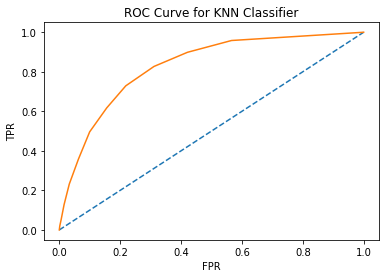

Area under the ROC Curve: 0.828533998793407


In [13]:
#Confusion Matrix
knn_confusion_matrix = confusion_matrix(Y_val, Y_knn_val_predicted)
print("Confusion Matrix:\n", knn_confusion_matrix)

knn_tn = knn_confusion_matrix[0][0]
knn_fp = knn_confusion_matrix[0][1]
knn_fn = knn_confusion_matrix[1][0]
knn_tp = knn_confusion_matrix[1][1]

#Print TPR, FPR
print("True Positive Rate:", (knn_tp)/(knn_tp+knn_fn))
print("False Positive Rate:", (knn_fp)/(knn_fp+knn_tn))
print("Precision:", (knn_tp)/(knn_tp + knn_fp))
print("F-Measure:", (2*knn_tp)/(2*knn_tp + knn_fn + knn_fp))

#ROC Curve
knn_prob = knn.predict_proba(X_val)
knn_prob = knn_prob[:, 1]
knn_fpr, knn_tpr, threshold = roc_curve(Y_val,knn_prob)
plt.title("ROC Curve for KNN Classifier")
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(knn_fpr, knn_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

auc = roc_auc_score(Y_val, knn_prob)
print("Area under the ROC Curve:", auc)

The second classifier we will build is the Decision Tree Classifier. The parameters used for the Decision Tree Classifier are:

1. Criterion for Splitting: Gini Index - We use the gini index and then calculate the maximum information gain to split the tree.
2. Max_Depth: The maximum depth of the tree used is 6. We shouldn't use a very high value of depth, which would result in overfitting, and a very small value would result in underfitting. We tried several values of depth and found 6 to be an optimum value.

In [14]:
#Classifier 2: Decision Tree Classifier
dtr = DecisionTreeClassifier(max_depth=6)
dtr.fit(X_train,Y_train)
Y_dtr_val_predicted=dtr.predict(X_val)
print("Validation Score for Decision Tree:", dtr.score(X_val, Y_val))

Validation Score for Decision Tree: 0.8232965201083559


The performance statistics for Decision Tree Classifier are shown below.

Confusion Matrix:
 [[3331  295]
 [ 553  620]]
True Positive Rate: 0.5285592497868713
False Positive Rate: 0.08135686707115279
Precision: 0.6775956284153005
F-Measure: 0.5938697318007663


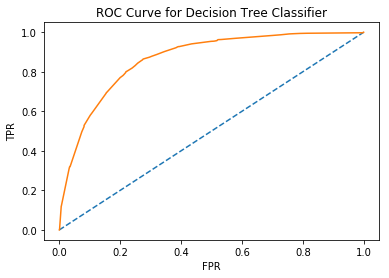

Area under the ROC Curve: 0.8648487597154021


In [15]:
#Confusion Matrix
dtr_confusion_matrix = confusion_matrix(Y_val, Y_dtr_val_predicted)
print("Confusion Matrix:\n", dtr_confusion_matrix)

dtr_tn = dtr_confusion_matrix[0][0]
dtr_fp = dtr_confusion_matrix[0][1]
dtr_fn = dtr_confusion_matrix[1][0]
dtr_tp = dtr_confusion_matrix[1][1]

#Print TPR, FPR
print("True Positive Rate:", (dtr_tp)/(dtr_tp+dtr_fn))
print("False Positive Rate:", (dtr_fp)/(dtr_fp+dtr_tn))
print("Precision:", (dtr_tp)/(dtr_tp + dtr_fp))
print("F-Measure:", (2*dtr_tp)/(2*dtr_tp + dtr_fn + dtr_fp))

#ROC Curve
dtr_prob = dtr.predict_proba(X_val)
dtr_prob = dtr_prob[:, 1]
dtr_fpr, dtr_tpr, threshold = roc_curve(Y_val,dtr_prob)
plt.title('ROC Curve for Decision Tree Classifier')
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(dtr_fpr, dtr_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc = roc_auc_score(Y_val, dtr_prob)
print("Area under the ROC Curve:",auc)

The third classifier we will use is the Naive Bayes Classifier. We use the GaussianNB library provided by scikit-learn. We haven't used any special parameters here and used only default parameters.

In [16]:
#Classifier 3: Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_nb_val_pred=nb.predict(X_val)
print("Validation Score for Naive Bayes Classifier:", nb.score(X_val, Y_val))

Validation Score for Naive Bayes Classifier: 0.7530735569910398


The performance statistics for Naive Bayes Classifier are shown below.

Confusion Matrix:
 [[2789  837]
 [ 348  825]]
True Positive Rate: 0.7033248081841432
False Positive Rate: 0.23083287369001654
Precision: 0.4963898916967509
F-Measure: 0.582010582010582


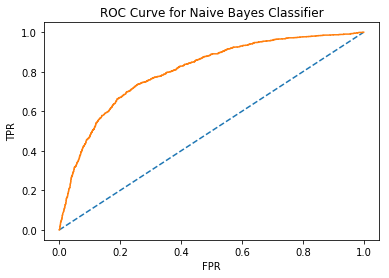

Area under the ROC Curve: 0.8037776802848049


In [17]:
#Confusion Matrix
nb_confusion_matrix = confusion_matrix(Y_val, Y_nb_val_pred)
print("Confusion Matrix:\n", nb_confusion_matrix)

nb_tn = nb_confusion_matrix[0][0]
nb_fp = nb_confusion_matrix[0][1]
nb_fn = nb_confusion_matrix[1][0]
nb_tp = nb_confusion_matrix[1][1]

#Print TPR, FPR
print("True Positive Rate:", (nb_tp)/(nb_tp+nb_fn))
print("False Positive Rate:", (nb_fp)/(nb_fp+nb_tn))
print("Precision:", (nb_tp)/(nb_tp + nb_fp))
print("F-Measure:", (2*nb_tp)/(2*nb_tp + nb_fn + nb_fp))

#ROC Curve
nb_prob = nb.predict_proba(X_val)
nb_prob = nb_prob[:, 1]
nb_fpr, nb_tpr, threshold = roc_curve(Y_val,nb_prob)
plt.title("ROC Curve for Naive Bayes Classifier")
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(nb_fpr, nb_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc = roc_auc_score(Y_val, nb_prob)
print("Area under the ROC Curve:", auc)

The final classifier for the adult dataset is the RandomForestClassifier which is an ensemble classifier combining Bagging and uses different feature sets in the tree-growing process.

Parameters used are:
1. n_estimators : This is the number of trees in the forest. We use a value of 15 as an optimum value.
2. max_depth : Like Decision Tree, the maximum depth of the tree in the random forest should be changed so that the model doesn't overfit/underfit. We use a value of 7 here.

Both the parameters were chosen after trying out various values and measuring the performance statistics.

In [18]:
#Classifier 4: Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=15,max_depth=7)
rfc.fit(X_train, Y_train)
y_rfc_val_pred = rfc.predict(X_val)
print("Validation Score for Random Forest:", rfc.score(X_val, Y_val))

Validation Score for Random Forest: 0.826838924775995


Confusion Matrix:
 [[3359  267]
 [ 564  609]]
True Positive Rate: 0.5191815856777494
False Positive Rate: 0.07363485934914506
Precision: 0.6952054794520548
F-Measure: 0.5944363103953147


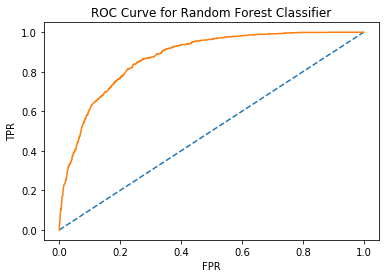

Area under the curve: 0.873333352142267


In [19]:
#Confusion Matrix
rfc_confusion_matrix = confusion_matrix(Y_val, y_rfc_val_pred)
print("Confusion Matrix:\n", rfc_confusion_matrix)

rfc_tn = rfc_confusion_matrix[0][0]
rfc_fp = rfc_confusion_matrix[0][1]
rfc_fn = rfc_confusion_matrix[1][0]
rfc_tp = rfc_confusion_matrix[1][1]

#Print TPR, FPR
print("True Positive Rate:", (rfc_tp)/(rfc_tp+rfc_fn))
print("False Positive Rate:", (rfc_fp)/(rfc_fp+rfc_tn))
print("Precision:", (rfc_tp)/(rfc_tp + rfc_fp))
print("F-Measure:", (2*rfc_tp)/(2*rfc_tp + rfc_fn + rfc_fp))

#ROC Curve
rfc_prob = rfc.predict_proba(X_val)
rfc_prob = rfc_prob[:, 1]
rfc_fpr, rfc_tpr, threshold = roc_curve(Y_val,rfc_prob)
plt.title("ROC Curve for Random Forest Classifier")
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(rfc_fpr, rfc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc = roc_auc_score(Y_val, rfc_prob)
print("Area under the curve:", auc)

Based on the above performance measures, we see that Random Forest Classifier is the best model for the adult dataset. We check the values of Accuracy, Precision, F-measure and AUC values, and Random Forest performs significantly better than rest of the classifiers. 

Now, we use the Random Forest Classifier to predict the value of test dataset and calculate its performance.

Accuracy Score for Random Forest: 0.8239706617769629
Confusion Matrix:
 [[4172  337]
 [ 719  771]]
True Positive Rate: 0.5174496644295302
False Positive Rate: 0.07473941006875139
Precision: 0.6958483754512635
F-Measure: 0.5935334872979214


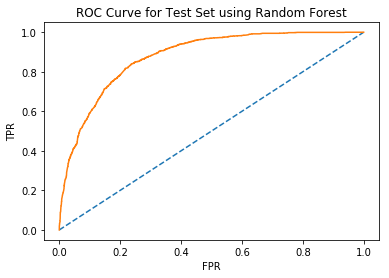

Area Under the Curve: 0.8771330567798036


In [20]:
#Random Forest for test dataset
y_rfc_test_pred = rfc.predict(X_test)
print("Accuracy Score for Random Forest:", rfc.score(X_test, Y_test))

#Confusion Matrix
rfc_confusion_matrix = confusion_matrix(Y_test, y_rfc_test_pred)
print("Confusion Matrix:\n", rfc_confusion_matrix)

rfc_tn = rfc_confusion_matrix[0][0]
rfc_fp = rfc_confusion_matrix[0][1]
rfc_fn = rfc_confusion_matrix[1][0]
rfc_tp = rfc_confusion_matrix[1][1]

#Print TPR, FPR
print("True Positive Rate:", (rfc_tp)/(rfc_tp+rfc_fn))
print("False Positive Rate:", (rfc_fp)/(rfc_fp+rfc_tn))
print("Precision:", (rfc_tp)/(rfc_tp + rfc_fp))
print("F-Measure:", (2*rfc_tp)/(2*rfc_tp + rfc_fn + rfc_fp))

#ROC Curve
rfc_prob = rfc.predict_proba(X_test)
rfc_prob = rfc_prob[:, 1]
rfc_fpr, rfc_tpr, threshold = roc_curve(Y_test,rfc_prob)

plt.title("ROC Curve for Test Set using Random Forest")
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(rfc_fpr, rfc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc = roc_auc_score(Y_test, rfc_prob)
print("Area Under the Curve:", auc)

We can see that, Random Forest Classifier gives a decent performance for the dataset.

# Classification on Wine Dataset

In [21]:
#Wine dataset
#Downloading and reading the dataset into a dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", 
           "total sulfur dioxide", "density", "pH", "sulphates","alcohol", "quality"
          ]
data = pd.read_csv(url, sep=';', na_values='?')

#Printing the first few values, to understand about the attributes.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We will preprocess the value of class to to Low and High, so that we could build a classification model.

In [22]:
#Data Preprocessing: Converting the quality attribute to class
#attribute having values Low and High
data['class'] = data['quality'].apply(lambda x: "Low" if x<=5 else "High")
data = data.drop(columns='quality')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


As a Data Preprocessing step, we will drop the missing values and duplicates. Based on the previous assignment, we will also one of the two  attributes which are redundant relative to each other. The correlation matrix in the previous assignment showed that the following independent attributes are redundant relative to each other.

1. Fixed Acidity and Citric Acid
2. Fixed Acidity and Density
3. Free Sulfur Dioxide and Total Sulfur Dioxide

We remove Citric Acid, Density and Free Sulfur Dioxide from the dataset. We also enocde the categorical variables(only the class attribute) to numbers so that we can use them in the classifier.

In [23]:
# Dropping missing values
data = data.dropna()
# Dropping duplicate values
data = data.drop_duplicates()
# Dropping redundant attributes
data = data.drop(columns=['citric acid','density','free sulfur dioxide'])
data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,class
0,7.4,0.70,1.9,0.076,34.0,3.51,0.56,9.4,Low
1,7.8,0.88,2.6,0.098,67.0,3.20,0.68,9.8,Low
2,7.8,0.76,2.3,0.092,54.0,3.26,0.65,9.8,Low
3,11.2,0.28,1.9,0.075,60.0,3.16,0.58,9.8,High
5,7.4,0.66,1.8,0.075,40.0,3.51,0.56,9.4,Low


In [24]:
#Converting categorical varibales to Categories using scikit-learn
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for column in data:
    if data.dtypes[column]==np.object:
        data[column] = labelEncoder.fit_transform(data[column])

data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,class
0,7.4,0.70,1.9,0.076,34.0,3.51,0.56,9.4,1
1,7.8,0.88,2.6,0.098,67.0,3.20,0.68,9.8,1
2,7.8,0.76,2.3,0.092,54.0,3.26,0.65,9.8,1
3,11.2,0.28,1.9,0.075,60.0,3.16,0.58,9.8,0
5,7.4,0.66,1.8,0.075,40.0,3.51,0.56,9.4,1


We have our data as a single table. To build a classification model, we need to split the data into features and labels. As the problem is to predict whether quality of wine is low or high, the column class is the label, with all the other columns forming the features for our classification model.

In [25]:
#Splitting into data and label for classification
num_columns = len(data.columns) -1
data_array = data.values
X = data_array[:,0:num_columns-1]
Y = data_array[:,num_columns]

Since, all the features are numerical values with different ranges, it would be better if we normalize the features before we train our model.

In [26]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Now, it is necessary to split our dataset into training and test set so that we can measure the performance of our model. We will use scikit-learn library's train_test_split function with 80% of the data for training and 20% of the data for testing purposes.

In [27]:
#Using train test split for Wine Dataset
X, X_test, Y, Y_test = train_test_split(X,Y, test_size=0.2,random_state=20, shuffle=True)

For the wine dataset, we will use the K Fold Cross Validation approach that would allow us to choose from the different classifiers we build and then use the best model to test on the testing set.

We use a 10 fold evaluation method, where the data is divided into 10 parts and 9 parts are used as training set and 1 part is used as validation, and it is repeated for each fold by changing the validation set as a different part and training set as the remaining 9 parts.

In [28]:
#We will use KFold validation for evalutating generalization performance
kf = KFold(n_splits=10, random_state=20, shuffle=True)

The first classifier we are going to build is the K Nearest Neighbor(KNN) Classifier which uses the class labels of K Closest Neighbors to find the class label of unknown records.

Parameters used are:

1. n_neighbors = 9 - The value of number of neighbors shouldn't be too low or too high. After trying out different values, 11 neighbors gave the optimum generalization performance.
2. Proximity metric - Minkowski distance, which is a generalization of the Euclidean distance and is a good metric for calculating the nearest distance when the dimensions are more.

We will also calculate various performance measures on the validation dataset. Since this is a K Fold validation, the performance measures will be evaluated for all folds, and we will use the average of F1 Measures and average of Accuracy values to judge our best model in the end.

K Fold validation. Fold:  1
Validation Score for KNN: 0.7064220183486238
Confusion Matrix:
 [[28 15]
 [17 49]]
True Positive Rate: 0.7424242424242424
False Positive Rate: 0.3488372093023256
Precision: 0.765625
F-Measure: 0.7538461538461538


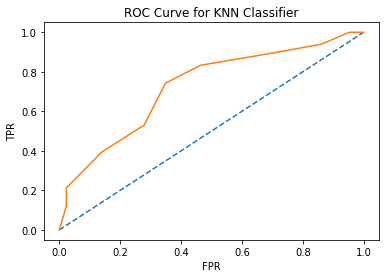

Area under the curve: 0.7239252995066948
K Fold validation. Fold:  1
Validation Score for KNN: 0.6880733944954128
Confusion Matrix:
 [[45 17]
 [17 30]]
True Positive Rate: 0.6382978723404256
False Positive Rate: 0.27419354838709675
Precision: 0.6382978723404256
F-Measure: 0.6382978723404256


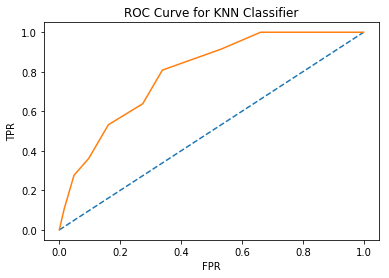

Area under the curve: 0.7930679478380234
K Fold validation. Fold:  1
Validation Score for KNN: 0.7339449541284404
Confusion Matrix:
 [[51 10]
 [19 29]]
True Positive Rate: 0.6041666666666666
False Positive Rate: 0.16393442622950818
Precision: 0.7435897435897436
F-Measure: 0.6666666666666666


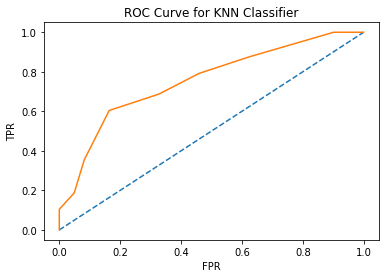

Area under the curve: 0.7544398907103825
K Fold validation. Fold:  1
Validation Score for KNN: 0.7431192660550459
Confusion Matrix:
 [[41 14]
 [14 40]]
True Positive Rate: 0.7407407407407407
False Positive Rate: 0.2545454545454545
Precision: 0.7407407407407407
F-Measure: 0.7407407407407407


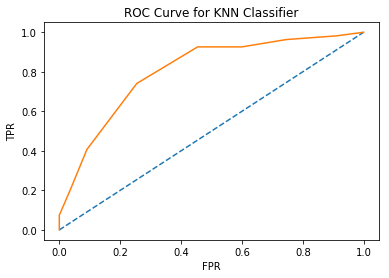

Area under the curve: 0.8035353535353535
K Fold validation. Fold:  1
Validation Score for KNN: 0.7064220183486238
Confusion Matrix:
 [[46 16]
 [16 31]]
True Positive Rate: 0.6595744680851063
False Positive Rate: 0.25806451612903225
Precision: 0.6595744680851063
F-Measure: 0.6595744680851063


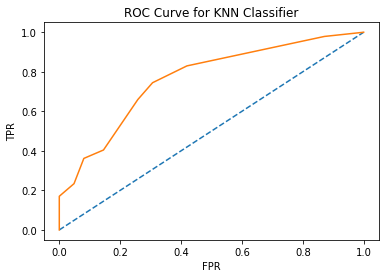

Area under the curve: 0.7630404941660948
K Fold validation. Fold:  1
Validation Score for KNN: 0.6513761467889908
Confusion Matrix:
 [[40 17]
 [21 31]]
True Positive Rate: 0.5961538461538461
False Positive Rate: 0.2982456140350877
Precision: 0.6458333333333334
F-Measure: 0.62


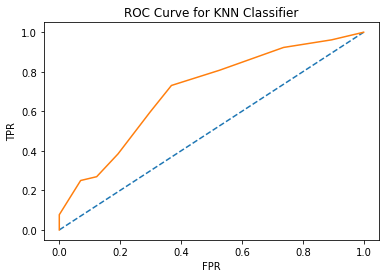

Area under the curve: 0.701923076923077
K Fold validation. Fold:  1
Validation Score for KNN: 0.6513761467889908
Confusion Matrix:
 [[45 18]
 [20 26]]
True Positive Rate: 0.5652173913043478
False Positive Rate: 0.2857142857142857
Precision: 0.5909090909090909
F-Measure: 0.5777777777777777


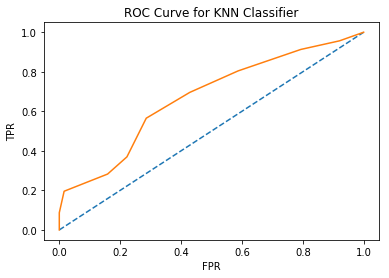

Area under the curve: 0.6694271911663217
K Fold validation. Fold:  1
Validation Score for KNN: 0.7407407407407407
Confusion Matrix:
 [[43 16]
 [12 37]]
True Positive Rate: 0.7551020408163265
False Positive Rate: 0.2711864406779661
Precision: 0.6981132075471698
F-Measure: 0.7254901960784313


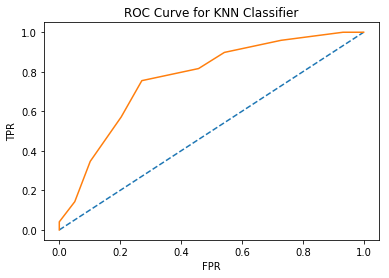

Area under the curve: 0.7680733310273262
K Fold validation. Fold:  1
Validation Score for KNN: 0.6481481481481481
Confusion Matrix:
 [[44 16]
 [22 26]]
True Positive Rate: 0.5416666666666666
False Positive Rate: 0.26666666666666666
Precision: 0.6190476190476191
F-Measure: 0.5777777777777777


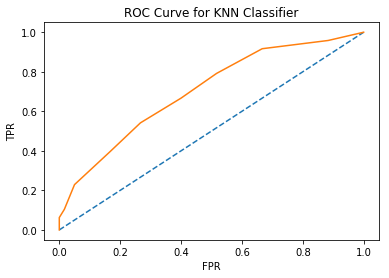

Area under the curve: 0.7013888888888888
K Fold validation. Fold:  1
Validation Score for KNN: 0.6666666666666666
Confusion Matrix:
 [[39 10]
 [26 33]]
True Positive Rate: 0.559322033898305
False Positive Rate: 0.20408163265306123
Precision: 0.7674418604651163
F-Measure: 0.6470588235294118


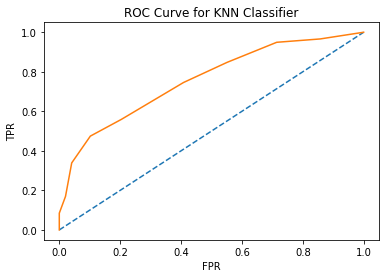

Area under the curve: 0.7563126945693531
Average Accuracy: 0.6936289500509684
Average F1 Score: 0.6607230476842492
Average TPR: 0.6402665969096674
Average FPR: 0.2625469794340485
Average Precision: 0.6869172936058344
Average AUC: 0.7435134168331516


In [29]:
i=1
avg_f1_score = []
avg_acc_score = []
avg_tpr = []
avg_fpr = []
avg_auc = []
avg_precision = []
avg_auc = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    print("K Fold validation. Fold: ",i)
    #Classifier 1: KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train, Y_train)
    Y_knn_val_predicted = knn.predict(X_val)
    
    print("Validation Score for KNN:", knn.score(X_val, Y_val))
    avg_acc_score.append(knn.score(X_val, Y_val))
    #Confusion Matrix
    knn_confusion_matrix = confusion_matrix(Y_val, Y_knn_val_predicted)
    print("Confusion Matrix:\n", knn_confusion_matrix)

    knn_tn = knn_confusion_matrix[0][0]
    knn_fp = knn_confusion_matrix[0][1]
    knn_fn = knn_confusion_matrix[1][0]
    knn_tp = knn_confusion_matrix[1][1]

    #Print TPR, FPR
    print("True Positive Rate:", (knn_tp)/(knn_tp+knn_fn))
    print("False Positive Rate:", (knn_fp)/(knn_fp+knn_tn))
    print("Precision:", (knn_tp)/(knn_tp + knn_fp))
    print("F-Measure:", (2*knn_tp)/(2*knn_tp + knn_fn + knn_fp))
    avg_tpr.append((knn_tp)/(knn_tp+knn_fn))
    avg_fpr.append((knn_fp)/(knn_fp+knn_tn))
    avg_precision.append((knn_tp)/(knn_tp + knn_fp))
    avg_f1_score.append((2*knn_tp)/(2*knn_tp + knn_fn + knn_fp))
    #ROC Curve
    knn_prob = knn.predict_proba(X_val)
    knn_prob = knn_prob[:, 1]
    knn_fpr, knn_tpr, threshold = roc_curve(Y_val,knn_prob)

    plt.title("ROC Curve for KNN Classifier")
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(knn_fpr, knn_tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    auc = roc_auc_score(Y_val, knn_prob)
    avg_auc.append(auc)
    print('Area under the curve:', auc) 
    
#Average Performance Scores
print("Average Accuracy:", sum(avg_acc_score)/10)
print("Average F1 Score:", sum(avg_f1_score)/10)
print("Average TPR:", sum(avg_tpr)/10)
print("Average FPR:", sum(avg_fpr)/10)
print("Average Precision:", sum(avg_precision)/10)
print("Average AUC:", sum(avg_auc)/10)

The second classifier we will build is the Decision Tree Classifier. The parameters used for the Decision Tree Classifier are:

Criterion for Splitting: Gini Index - We use the gini index and then calculate the maximum information gain to split the tree.
Max_Depth: The maximum depth of the tree used is 4. We shouldn't use a very high value of depth, which would result in overfitting, and a very small value would result in underfitting. We tried several values of depth and found 6 to be an optimum value.

We will also calculate various performance measures on the validation dataset.

K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.6880733944954128
Confusion Matrix:
 [[26 17]
 [17 49]]
True Positive Rate: 0.7424242424242424
False Positive Rate: 0.3953488372093023
Precision: 0.7424242424242424
F-Measure: 0.7424242424242424


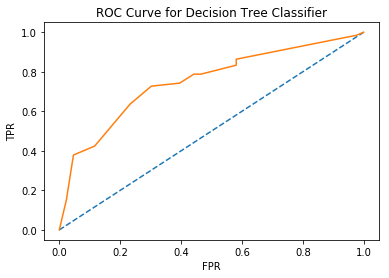

Area under the Curve: 0.7501761804087386
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.7706422018348624
Confusion Matrix:
 [[53  9]
 [16 31]]
True Positive Rate: 0.6595744680851063
False Positive Rate: 0.14516129032258066
Precision: 0.775
F-Measure: 0.7126436781609196


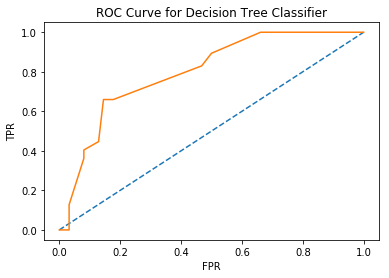

Area under the Curve: 0.7980439258750858
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.6330275229357798
Confusion Matrix:
 [[42 19]
 [21 27]]
True Positive Rate: 0.5625
False Positive Rate: 0.3114754098360656
Precision: 0.5869565217391305
F-Measure: 0.574468085106383


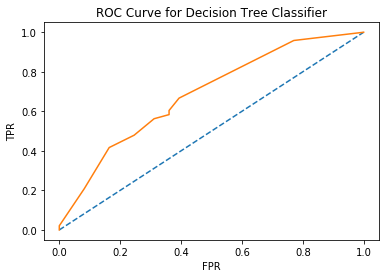

Area under the Curve: 0.6859631147540983
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.7614678899082569
Confusion Matrix:
 [[45 10]
 [16 38]]
True Positive Rate: 0.7037037037037037
False Positive Rate: 0.18181818181818182
Precision: 0.7916666666666666
F-Measure: 0.7450980392156863


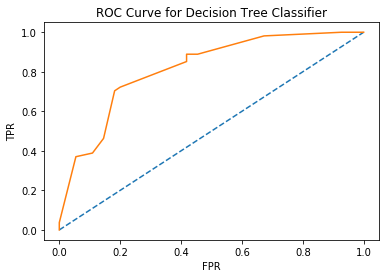

Area under the Curve: 0.8144781144781144
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.7431192660550459
Confusion Matrix:
 [[49 13]
 [15 32]]
True Positive Rate: 0.6808510638297872
False Positive Rate: 0.20967741935483872
Precision: 0.7111111111111111
F-Measure: 0.6956521739130435


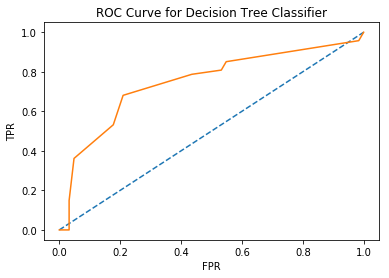

Area under the Curve: 0.747254632807138
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.6238532110091743
Confusion Matrix:
 [[33 24]
 [17 35]]
True Positive Rate: 0.6730769230769231
False Positive Rate: 0.42105263157894735
Precision: 0.5932203389830508
F-Measure: 0.6306306306306306


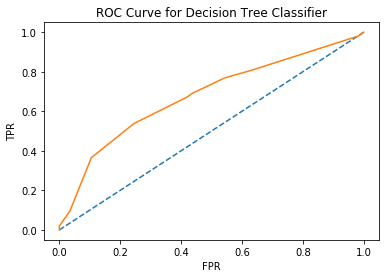

Area under the Curve: 0.6771255060728745
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.6330275229357798
Confusion Matrix:
 [[43 20]
 [20 26]]
True Positive Rate: 0.5652173913043478
False Positive Rate: 0.31746031746031744
Precision: 0.5652173913043478
F-Measure: 0.5652173913043478


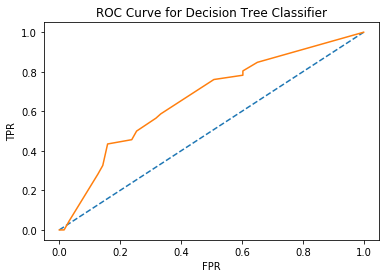

Area under the Curve: 0.6658040027605245
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.6574074074074074
Confusion Matrix:
 [[35 24]
 [13 36]]
True Positive Rate: 0.7346938775510204
False Positive Rate: 0.4067796610169492
Precision: 0.6
F-Measure: 0.6605504587155964


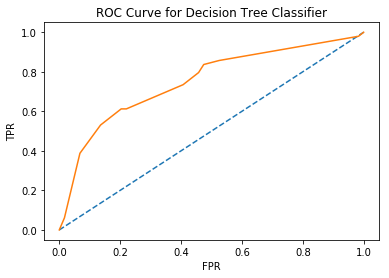

Area under the Curve: 0.7506053268765133
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.7037037037037037
Confusion Matrix:
 [[46 14]
 [18 30]]
True Positive Rate: 0.625
False Positive Rate: 0.23333333333333334
Precision: 0.6818181818181818
F-Measure: 0.6521739130434783


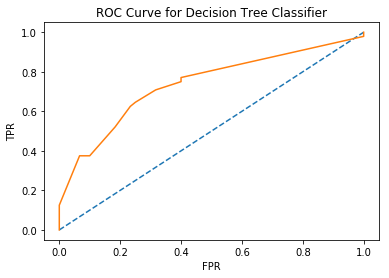

Area under the Curve: 0.7366319444444445
K Fold validation. Fold:  1
Validation Score for Decision Tree: 0.7222222222222222
Confusion Matrix:
 [[30 19]
 [11 48]]
True Positive Rate: 0.8135593220338984
False Positive Rate: 0.3877551020408163
Precision: 0.7164179104477612
F-Measure: 0.7619047619047619


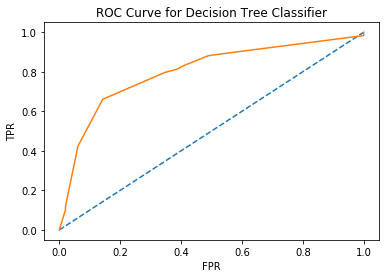

Area under the Curve: 0.8004150812867521
Average Accuracy: 0.6936544342507645
Average F1 Score: 0.674076337441909
Average TPR: 0.6760600992009029
Average FPR: 0.30098621839713324
Average Precision: 0.6763832364494492
Average AUC: 0.7426497829764285


In [30]:
i=1
avg_f1_score = []
avg_acc_score = []
avg_tpr = []
avg_fpr = []
avg_auc = []
avg_precision = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    print("K Fold validation. Fold: ",i)
    #Classifier 2: Decision Tree Classifier
    dtr = DecisionTreeClassifier(max_depth=4)
    dtr.fit(X_train,Y_train)
    Y_dtr_val_predicted=dtr.predict(X_val)
    
    print("Validation Score for Decision Tree:", dtr.score(X_val, Y_val))
    
    avg_acc_score.append(dtr.score(X_val, Y_val))
    #Confusion Matrix
    dtr_confusion_matrix = confusion_matrix(Y_val, Y_dtr_val_predicted)
    print("Confusion Matrix:\n", dtr_confusion_matrix)

    dtr_tn = dtr_confusion_matrix[0][0]
    dtr_fp = dtr_confusion_matrix[0][1]
    dtr_fn = dtr_confusion_matrix[1][0]
    dtr_tp = dtr_confusion_matrix[1][1]

    #Print TPR, FPR
    print("True Positive Rate:", (dtr_tp)/(dtr_tp+dtr_fn))
    print("False Positive Rate:", (dtr_fp)/(dtr_fp+dtr_tn))
    print("Precision:", (dtr_tp)/(dtr_tp + dtr_fp))
    print("F-Measure:", (2*dtr_tp)/(2*dtr_tp + dtr_fn + dtr_fp))
    avg_tpr.append((dtr_tp)/(dtr_tp+dtr_fn))
    avg_fpr.append((dtr_fp)/(dtr_fp+dtr_tn))
    avg_precision.append((dtr_tp)/(dtr_tp + dtr_fp))
    avg_f1_score.append((2*dtr_tp)/(2*dtr_tp + dtr_fn + dtr_fp))
    #ROC Curve
    dtr_prob = dtr.predict_proba(X_val)
    dtr_prob = dtr_prob[:, 1]
    dtr_fpr, dtr_tpr, threshold = roc_curve(Y_val,dtr_prob)

    plt.title("ROC Curve for Decision Tree Classifier")
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(dtr_fpr, dtr_tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    auc = roc_auc_score(Y_val, dtr_prob)
    avg_auc.append(auc)
    print('Area under the Curve:', auc)

#Average Performance Scores
print("Average Accuracy:", sum(avg_acc_score)/10)
print("Average F1 Score:", sum(avg_f1_score)/10)
print("Average TPR:", sum(avg_tpr)/10)
print("Average FPR:", sum(avg_fpr)/10)
print("Average Precision:", sum(avg_precision)/10)
print("Average AUC:", sum(avg_auc)/10)

The third classifier we will use is the Logistic Regression Classifier. We use the LogisticRegression library provided by scikit-learn. We haven't used any special parameters here and used only default parameters, since they performed well.

We will also calculate various performance measures on the validation dataset.

K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6513761467889908
Confusion Matrix:
 [[29 14]
 [24 42]]
True Positive Rate: 0.6363636363636364
False Positive Rate: 0.32558139534883723
Precision: 0.75
F-Measure: 0.6885245901639344


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


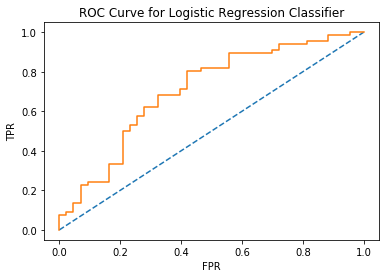

Area under the curve: 0.7036645525017619
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.7155963302752294
Confusion Matrix:
 [[46 16]
 [15 32]]
True Positive Rate: 0.6808510638297872
False Positive Rate: 0.25806451612903225
Precision: 0.6666666666666666
F-Measure: 0.6736842105263158


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


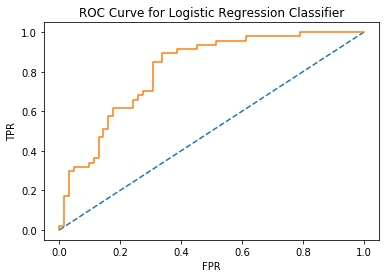

Area under the curve: 0.8098833218943035
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6513761467889908
Confusion Matrix:
 [[44 17]
 [21 27]]
True Positive Rate: 0.5625
False Positive Rate: 0.2786885245901639
Precision: 0.6136363636363636
F-Measure: 0.5869565217391305


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


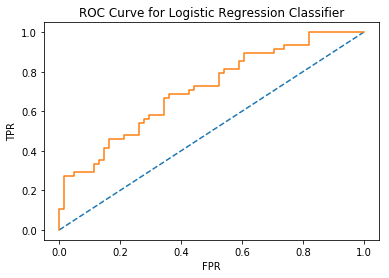

Area under the curve: 0.7103825136612022
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.7706422018348624
Confusion Matrix:
 [[46  9]
 [16 38]]
True Positive Rate: 0.7037037037037037
False Positive Rate: 0.16363636363636364
Precision: 0.8085106382978723
F-Measure: 0.7524752475247525


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


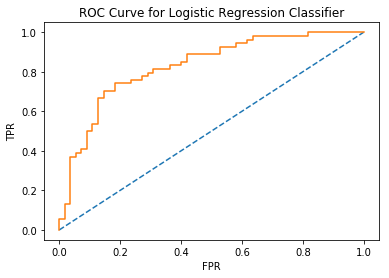

Area under the curve: 0.8276094276094276
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.7247706422018348
Confusion Matrix:
 [[51 11]
 [19 28]]
True Positive Rate: 0.5957446808510638
False Positive Rate: 0.1774193548387097
Precision: 0.717948717948718
F-Measure: 0.6511627906976745


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


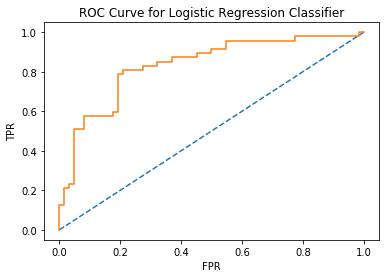

Area under the curve: 0.8325326012354153
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6697247706422018
Confusion Matrix:
 [[43 14]
 [22 30]]
True Positive Rate: 0.5769230769230769
False Positive Rate: 0.24561403508771928
Precision: 0.6818181818181818
F-Measure: 0.625


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


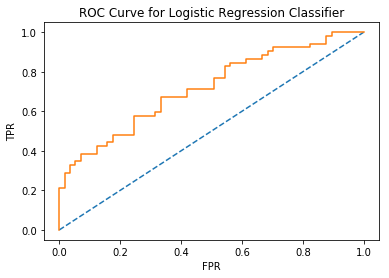

Area under the curve: 0.717948717948718
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6422018348623854
Confusion Matrix:
 [[44 19]
 [20 26]]
True Positive Rate: 0.5652173913043478
False Positive Rate: 0.30158730158730157
Precision: 0.5777777777777777
F-Measure: 0.5714285714285714


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


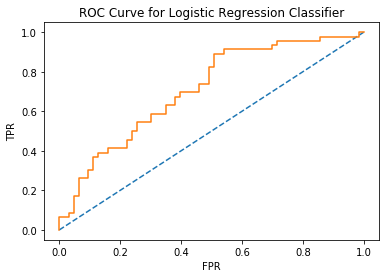

Area under the curve: 0.7091097308488613
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6574074074074074
Confusion Matrix:
 [[41 18]
 [19 30]]
True Positive Rate: 0.6122448979591837
False Positive Rate: 0.3050847457627119
Precision: 0.625
F-Measure: 0.6185567010309279


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


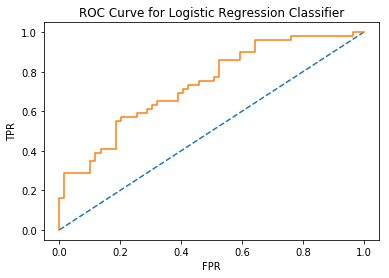

Area under the curve: 0.7350397786233137
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6944444444444444
Confusion Matrix:
 [[49 11]
 [22 26]]
True Positive Rate: 0.5416666666666666
False Positive Rate: 0.18333333333333332
Precision: 0.7027027027027027
F-Measure: 0.611764705882353


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


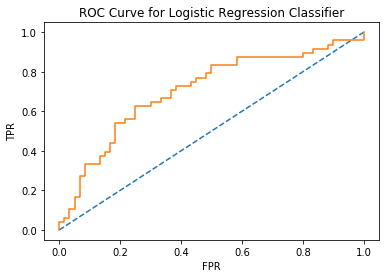

Area under the curve: 0.7052083333333332
K Fold validation. Fold:  1
Validation Score for Logistic Regression: 0.6481481481481481
Confusion Matrix:
 [[37 12]
 [26 33]]
True Positive Rate: 0.559322033898305
False Positive Rate: 0.24489795918367346
Precision: 0.7333333333333333
F-Measure: 0.6346153846153846


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


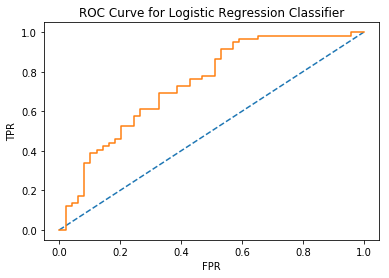

Area under the curve: 0.7398823936354203
Average Accuracy: 0.6825688073394496
Average F1 Score: 0.6414168723609045
Average TPR: 0.6034537151499773
Average FPR: 0.24839075294978458
Average Precision: 0.6877394382181616
Average AUC: 0.7491261371291756


In [31]:
i=1
avg_f1_score = []
avg_acc_score = []
avg_tpr = []
avg_fpr = []
avg_auc = []
avg_precision = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    print("K Fold validation. Fold: ",i)
    #Classifier 3: Logistic Regression Classifier
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_lr_val_predicted=lr.predict(X_val)
    
    print("Validation Score for Logistic Regression:", lr.score(X_val, Y_val))
    
    avg_acc_score.append(lr.score(X_val, Y_val))
    #Confusion Matrix
    lr_confusion_matrix = confusion_matrix(Y_val, Y_lr_val_predicted)
    print("Confusion Matrix:\n", lr_confusion_matrix)

    lr_tn = lr_confusion_matrix[0][0]
    lr_fp = lr_confusion_matrix[0][1]
    lr_fn = lr_confusion_matrix[1][0]
    lr_tp = lr_confusion_matrix[1][1]

    #Print TPR, FPR
    print("True Positive Rate:", (lr_tp)/(lr_tp+lr_fn))
    print("False Positive Rate:", (lr_fp)/(lr_fp+lr_tn))
    print("Precision:", (lr_tp)/(lr_tp + lr_fp))
    print("F-Measure:", (2*lr_tp)/(2*lr_tp + lr_fn + lr_fp))
    avg_tpr.append((lr_tp)/(lr_tp+lr_fn))
    avg_fpr.append((lr_fp)/(lr_fp+lr_tn))
    avg_precision.append((lr_tp)/(lr_tp + lr_fp))
    avg_f1_score.append((2*lr_tp)/(2*lr_tp + lr_fn + lr_fp))
    #ROC Curve
    lr_prob = lr.predict_proba(X_val)
    lr_prob = lr_prob[:, 1]
    lr_fpr, lr_tpr, threshold = roc_curve(Y_val,lr_prob)
    
    plt.title("ROC Curve for Logistic Regression Classifier")
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(lr_fpr, lr_tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    auc = roc_auc_score(Y_val, lr_prob)
    avg_auc.append(auc)
    print('Area under the curve:', auc)

#Average Performance Scores
print("Average Accuracy:", sum(avg_acc_score)/10)
print("Average F1 Score:", sum(avg_f1_score)/10)
print("Average TPR:", sum(avg_tpr)/10)
print("Average FPR:", sum(avg_fpr)/10)
print("Average Precision:", sum(avg_precision)/10)
print("Average AUC:", sum(avg_auc)/10)

The final classifier for the adult dataset is the Random Forest Classifier which is an ensemble classifier combining Bagging and uses different feature sets in the tree-growing process.

Parameters used are:

1. n_estimators : This is the number of trees in the forest. We use a value of 15 as an optimum value.
2. max_depth : Like Decision Tree, the maximum depth of the tree in the random forest should be changed so that the model doesn't overfit/underfit. We use a value of 4 here.
Both the parameters were chosen after trying out various values and measuring the performance statistics.

We also calculate the various performance measures on the validation set.

K Fold validation. Fold:  1
Validation Score for Random Forest: 0.6880733944954128
Confusion Matrix:
 [[28 15]
 [19 47]]
True Positive Rate: 0.7121212121212122
False Positive Rate: 0.3488372093023256
Precision: 0.7580645161290323
F-Measure: 0.734375


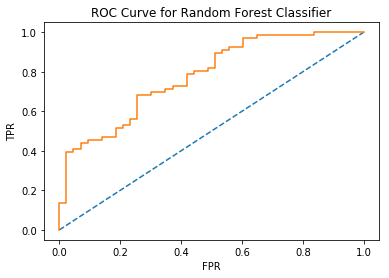

Area under the curve: 0.7776603241719521
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.7522935779816514
Confusion Matrix:
 [[51 11]
 [16 31]]
True Positive Rate: 0.6595744680851063
False Positive Rate: 0.1774193548387097
Precision: 0.7380952380952381
F-Measure: 0.6966292134831461


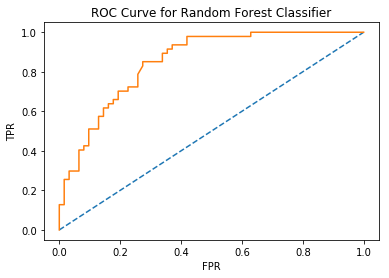

Area under the curve: 0.8503774879890186
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.6605504587155964
Confusion Matrix:
 [[45 16]
 [21 27]]
True Positive Rate: 0.5625
False Positive Rate: 0.26229508196721313
Precision: 0.627906976744186
F-Measure: 0.5934065934065934


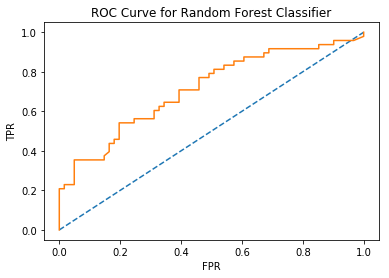

Area under the curve: 0.7119193989071039
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.7614678899082569
Confusion Matrix:
 [[44 11]
 [15 39]]
True Positive Rate: 0.7222222222222222
False Positive Rate: 0.2
Precision: 0.78
F-Measure: 0.75


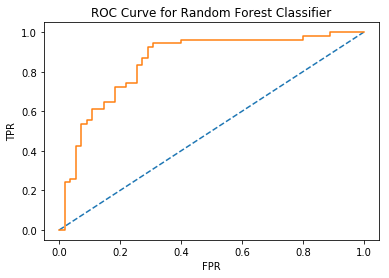

Area under the curve: 0.8528619528619528
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.7431192660550459
Confusion Matrix:
 [[45 17]
 [11 36]]
True Positive Rate: 0.7659574468085106
False Positive Rate: 0.27419354838709675
Precision: 0.6792452830188679
F-Measure: 0.72


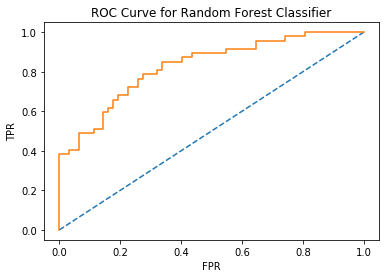

Area under the curve: 0.8263555250514756
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.6880733944954128
Confusion Matrix:
 [[44 13]
 [21 31]]
True Positive Rate: 0.5961538461538461
False Positive Rate: 0.22807017543859648
Precision: 0.7045454545454546
F-Measure: 0.6458333333333334


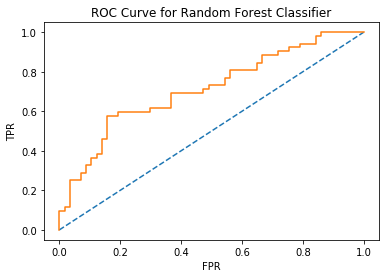

Area under the curve: 0.7115384615384616
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.6330275229357798
Confusion Matrix:
 [[40 23]
 [17 29]]
True Positive Rate: 0.6304347826086957
False Positive Rate: 0.36507936507936506
Precision: 0.5576923076923077
F-Measure: 0.5918367346938775


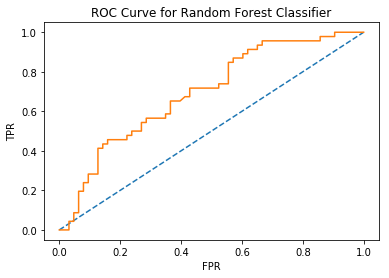

Area under the curve: 0.6944444444444444
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.6481481481481481
Confusion Matrix:
 [[38 21]
 [17 32]]
True Positive Rate: 0.6530612244897959
False Positive Rate: 0.3559322033898305
Precision: 0.6037735849056604
F-Measure: 0.6274509803921569


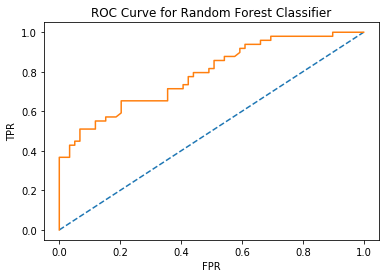

Area under the curve: 0.787616741611899
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.6944444444444444
Confusion Matrix:
 [[45 15]
 [18 30]]
True Positive Rate: 0.625
False Positive Rate: 0.25
Precision: 0.6666666666666666
F-Measure: 0.6451612903225806


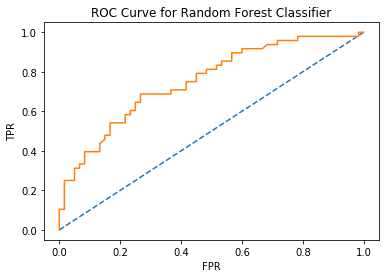

Area under the curve: 0.7527777777777777
K Fold validation. Fold:  1
Validation Score for Random Forest: 0.7870370370370371
Confusion Matrix:
 [[41  8]
 [15 44]]
True Positive Rate: 0.7457627118644068
False Positive Rate: 0.16326530612244897
Precision: 0.8461538461538461
F-Measure: 0.7927927927927928


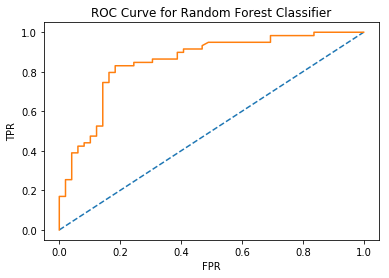

Area under the curve: 0.8503977862331373
Average Accuracy: 0.7323139653414883
Average F1 Score: 0.6797485938424479
Average TPR: 0.6672787914353795
Average FPR: 0.28335309548666054
Average Precision: 0.696214387395126
Average AUC: 0.7815949900587222


In [32]:
i=1
avg_f1_score = []
avg_acc_score = []
avg_tpr = []
avg_fpr = []
avg_auc = []
avg_precision = []
#Classifier 4: Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=15,max_depth=4)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    print("K Fold validation. Fold: ",i)
    rfc.fit(X_train, Y_train)
    y_rfc_val_pred = rfc.predict(X_val)
    print("Validation Score for Random Forest:", rfc.score(X_val, Y_val))
    
    
    avg_acc_score.append(dtr.score(X_val, Y_val))
    #Confusion Matrix
    rfc_confusion_matrix = confusion_matrix(Y_val, y_rfc_val_pred)
    print("Confusion Matrix:\n", rfc_confusion_matrix)

    rfc_tn = rfc_confusion_matrix[0][0]
    rfc_fp = rfc_confusion_matrix[0][1]
    rfc_fn = rfc_confusion_matrix[1][0]
    rfc_tp = rfc_confusion_matrix[1][1]

    #Print TPR, FPR
    print("True Positive Rate:", (rfc_tp)/(rfc_tp+rfc_fn))
    print("False Positive Rate:", (rfc_fp)/(rfc_fp+rfc_tn))
    print("Precision:", (rfc_tp)/(rfc_tp + rfc_fp))
    print("F-Measure:", (2*rfc_tp)/(2*rfc_tp + rfc_fn + rfc_fp))
    avg_tpr.append((rfc_tp)/(rfc_tp+rfc_fn))
    avg_fpr.append((rfc_fp)/(lr_fp+rfc_tn))
    avg_precision.append((rfc_tp)/(rfc_tp + rfc_fp))
    avg_f1_score.append((2*rfc_tp)/(2*rfc_tp + rfc_fn + rfc_fp))
    #ROC Curve
    rfc_prob = rfc.predict_proba(X_val)
    rfc_prob = rfc_prob[:, 1]
    rfc_fpr, rfc_tpr, threshold = roc_curve(Y_val,rfc_prob)
    
    plt.title("ROC Curve for Random Forest Classifier")
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(rfc_fpr, rfc_tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    auc = roc_auc_score(Y_val, rfc_prob)
    avg_auc.append(auc)
    print('Area under the curve:', auc)

#Average Performance Scores
print("Average Accuracy:", sum(avg_acc_score)/10)
print("Average F1 Score:", sum(avg_f1_score)/10)
print("Average TPR:", sum(avg_tpr)/10)
print("Average FPR:", sum(avg_fpr)/10)
print("Average Precision:", sum(avg_precision)/10)
print("Average AUC:", sum(avg_auc)/10)

Based on the above performance measures, we see that Random Forest Classifier is the best model for the adult dataset. We check the values of average Accuracy,  average F-measure, average AUC which are all higher and also looking at other measures, and Random Forest again performs significantly better than rest of the classifiers.

Now, we use the Random Forest Classifier to predict the value of test dataset and calculate its performance.

Test Score for Random Forest Classifier: 0.7132352941176471
Confusion Matrix:
 [[119  29]
 [ 49  75]]
True Positive Rate: 0.6048387096774194
False Positive Rate: 0.19594594594594594
Precision: 0.7211538461538461
F-Measure: 0.6578947368421053


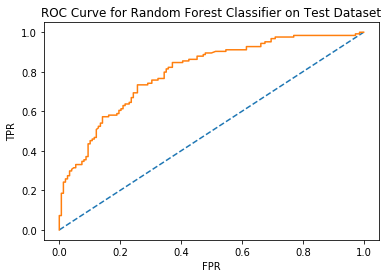

Area under the curve: 0.798550566695728


In [33]:
#Logistic Regression for test set
Y_rfc_test_predicted=rfc.predict(X_test)

print("Test Score for Random Forest Classifier:", rfc.score(X_test, Y_test))

#Confusion Matrix
rfc_confusion_matrix = confusion_matrix(Y_test, Y_rfc_test_predicted)
print("Confusion Matrix:\n", rfc_confusion_matrix)

rfc_tn = rfc_confusion_matrix[0][0]
rfc_fp = rfc_confusion_matrix[0][1]
rfc_fn = rfc_confusion_matrix[1][0]
rfc_tp = rfc_confusion_matrix[1][1]

#Print TPR, FPR
print("True Positive Rate:", (rfc_tp)/(rfc_tp+rfc_fn))
print("False Positive Rate:", (rfc_fp)/(rfc_fp+rfc_tn))
print("Precision:", (rfc_tp)/(rfc_tp + rfc_fp))
print("F-Measure:", (2*rfc_tp)/(2*rfc_tp + rfc_fn + rfc_fp))

#ROC Curve
rfc_prob = rfc.predict_proba(X_test)
rfc_prob = rfc_prob[:, 1]
rfc_fpr, rfc_tpr, threshold = roc_curve(Y_test,rfc_prob)

plt.title("ROC Curve for Random Forest Classifier on Test Dataset")
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(rfc_fpr, rfc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc = roc_auc_score(Y_test,rfc_prob)
print('Area under the curve:', auc)

We can see that, Random Forest Classifier gives a decent performance for the dataset.